In [1]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
dataset_train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# Importing the keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
# Initialising the RNN

regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
# Adding the second LSTM layer and some Dropout regularisation

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [10]:
# Adding the third LSTM layer and some Dropout regularisation

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [11]:
# Adding the fourth LSTM layer and some Dropout regularisation

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [12]:
# Adding the output layer

regressor.add(Dense(units = 1))

In [13]:
# Compiling the RNN

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Fitting the RNN to the training set

regressor.fit(X_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 110ms/step - loss: 0.1023
Epoch 2/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0047
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0045
Epoch 5/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0037
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0036
Epoch 11/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0040
Epoch 13/100

In [15]:
# Part - 3 Making the predictions and visualising the results

# Getting the real stock price of 2017
uploaded1 = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [16]:
dataset_test = pd.read_csv(io.BytesIO(uploaded1['Google_Stock_Price_Test.csv']))

In [17]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

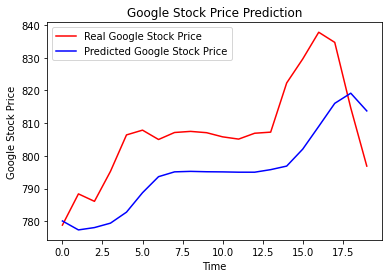

In [19]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()